In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from src.datasets import eu_data_ehu

In this notebook we present an exploration of the datasets for both cycles and embryos. We start by displaying which features are stored in the raw datasets and then show what comes out of the preprocessing stage. For the rest of the notebook we investigate relevant properties of the features and important interactions between them.

# Importing data

## Raw data

In [2]:
data_cycles = pd.read_csv('data/eh_cycles.csv', sep=',', header=0)

In [3]:
list(data_cycles)

['Codigo',
 'TEsteril',
 'Indicac',
 'Edad',
 'IMC',
 'EmbPrev',
 'AboPrev',
 'FSH',
 'Ciclosprevios',
 'AMH',
 'folAntral',
 'E2',
 'P4',
 'lEnd',
 'caSemen',
 'REM',
 'Protocol',
 'Estimul',
 'dEst',
 'unidFSH',
 'unidLH',
 'nEmbObten',
 'TasaFertil',
 'nEmbTrans',
 'TasaExito']

In [4]:
pd.set_option('display.max_columns', 50)
data_cycles.head()

,Codigo,TEsteril,Indicac,Edad,IMC,EmbPrev,AboPrev,FSH,Ciclosprevios,AMH,folAntral,E2,P4,lEnd,caSemen,REM,Protocol,Estimul,dEst,unidFSH,unidLH,nEmbObten,TasaFertil,nEmbTrans,TasaExito
0,0,5,masculino,39,24.06,No,No,8.3,1.0,2.3,20.0,4555.0,1.5,10.0,OAT,0.2,PC+Ant,FSHur+hMG,10,3000.0,750.0,7.0,78.0,2.0,0.0
1,1,4,mixto,34,21.60,No,No,10.7,0.0,1.1,4.0,2257.0,0.5,10.0,A,7.4,PC+Ant,FSHrec+hMG,11,4125.0,1650.0,4.0,100.0,3.0,0.0
2,2,2,mixto,36,19.84,No,No,6.1,0.0,0.8,10.0,2789.0,1.1,8.4,A,0.3,PC+Ant,FSHrec+hMG,11,3750.0,1275.0,2.0,25.0,2.0,0.0
3,3,3,tubarico,39,21.60,Si,Si,5.4,0.0,1.8,9.0,1200.0,0.8,10.0,N,34.1,PC+Ant,FSHrec+hMG,9,2850.0,1200.0,2.0,67.0,2.0,0.0
4,4,4,fracasoia,34,20.00,Si,Si,7.0,0.0,1.3,10.0,2972.0,1.0,9.6,N,37.2,PC+Ant,FSHrec,9,2550.0,0.0,7.0,70.0,3.0,0.0


In [5]:
data_embryos = pd.read_csv('data/eh_embryos.csv', sep=',', header=0)

In [6]:
list(data_embryos)

['CodigoCiclo',
 'CodigoOvoc',
 'Tecnica',
 'Vac',
 'REL',
 'Epv',
 'CP',
 'PN',
 'CP.1',
 'Z',
 'nCel+2',
 'frag+2',
 'simet+2',
 'ZP+2',
 'vac+2',
 'multiNuc+2',
 'CALIDAD+2',
 'Transfer',
 'Vitrificado',
 'TasaExito']

In [7]:
data_embryos.head()

,CodigoCiclo,CodigoOvoc,Tecnica,Vac,REL,Epv,CP,PN,CP.1,Z,nCel+2,frag+2,simet+2,ZP+2,vac+2,multiNuc+2,CALIDAD+2,Transfer,Vitrificado,TasaExito
0,0,0,ICSI,No,No,Normal,Normal,2,2,Z1,4.0,10.0,Si,Normal,No,No,A,Si,NaN,0.0
1,0,1,ICSI,No,No,Normal,Normal,2,2,Z1,4.0,10.0,No,Normal,No,No,C,No,NaN,NaN
2,0,2,ICSI,No,No,Normal,Normal,2,2,Z1,2.0,20.0,Si,Normal,No,No,B,No,NaN,NaN
3,0,3,ICSI,No,No,Normal,Normal,2,2,Z1,4.0,30.0,No,Normal,No,No,C,No,NaN,NaN
4,0,4,ICSI,No,No,Normal,Normal,2,2,Z1,4.0,5.0,Si,Normal,No,No,A,Si,NaN,0.0


In [8]:
data_cycles.isna().any()

Codigo           False
TEsteril         False
Indicac          False
Edad             False
IMC              False
EmbPrev          False
AboPrev          False
FSH              False
Ciclosprevios    False
AMH               True
folAntral        False
E2               False
P4               False
lEnd             False
caSemen          False
REM              False
Protocol         False
Estimul          False
dEst             False
unidFSH          False
unidLH           False
nEmbObten        False
TasaFertil       False
nEmbTrans        False
TasaExito        False
dtype: bool

In [9]:
sum(data_cycles.AMH.isna())

240

## Preprocessed data

The preprocessing of the data occurs directly on the initialization method when we declare a new instance of the *eu_data_ehu* class (from the datasets module).

In [15]:
data=eu_data_ehu()

--- unique self.embryo_was_implanted datasets.py: {-1: 2178, 0: 839, 1: 108}


In [17]:
list(data.data_embryos)

['CodigoCiclo',
 'CodigoOvoc',
 'PN',
 'CP.1',
 'nCel+2',
 'frag+2',
 'Transfer',
 'Vitrificado',
 'TasaExito',
 'Tecnica_FIV',
 'Tecnica_ICSI',
 'Vac_Abundantes',
 'Vac_Escasas',
 'Vac_No',
 'REL_No',
 'REL_Si',
 'Epv_Aumentado',
 'Epv_Normal',
 'CP_Anormal',
 'CP_Normal',
 'Z_Z1',
 'Z_Z2',
 'Z_Z3',
 'Z_Z4',
 'simet+2_No',
 'simet+2_Si',
 'ZP+2_Anormal',
 'ZP+2_Normal',
 'vac+2_Abundantes',
 'vac+2_Escasas',
 'vac+2_No',
 'multiNuc+2_NO',
 'multiNuc+2_No',
 'multiNuc+2_Si',
 'CALIDAD+2_A',
 'CALIDAD+2_B',
 'CALIDAD+2_C',
 'CALIDAD+2_D']

In [18]:
list(data.data_cycles)

['Codigo',
 'TEsteril',
 'Edad',
 'IMC',
 'FSH',
 'Ciclosprevios',
 'AMH',
 'folAntral',
 'E2',
 'P4',
 'lEnd',
 'REM',
 'dEst',
 'unidFSH',
 'unidLH',
 'nEmbObten',
 'TasaFertil',
 'nEmbTrans',
 'TasaExito',
 'Indicac_desconocido',
 'Indicac_endometriosis',
 'Indicac_fracasoia',
 'Indicac_masculino',
 'Indicac_mixto',
 'Indicac_otros',
 'Indicac_tubarico',
 'EmbPrev_No',
 'EmbPrev_Si',
 'AboPrev_No',
 'AboPrev_Si',
 'caSemen_A',
 'caSemen_N',
 'caSemen_O',
 'caSemen_OA',
 'caSemen_OAT',
 'Protocol_PC+Agon',
 'Protocol_PC+Ant',
 'Protocol_PL',
 'Estimul_FSH+Lhrec',
 'Estimul_FSHrec',
 'Estimul_FSHrec+hMG',
 'Estimul_FSHur',
 'Estimul_FSHur+hMG',
 'Estimul_hMG']

This was the list of features for both embryos and cycles before removing unnecessary features and scaling. Once this last step is carried out we obtain the following arrays.

In [20]:
data.embryos.shape

(3125, 25)

In [21]:
data.cycles.shape

(604, 36)

# Data Exploration

## Success rates

In [11]:
pos=sum(data_cycles['TasaExito'] > 0)
full=sum(data_cycles['TasaExito']== 1)
neg=sum(data_cycles['TasaExito'] == 0)

print('Total Cycles: ',pos+neg)
print('Cycles resulting in pregnancy: ', pos)
print('Cycles w all embryos implanted: ', full)
print('Cycles partially implanted: ', pos-full)
print('Failed cycles: ', neg)

Total Cycles:  604
Cycles resulting in pregnancy:  192
Cycles w all embryos implanted:  57
Cycles partially implanted:  135
Failed cycles:  412


Text(0, 0.5, 'Count')

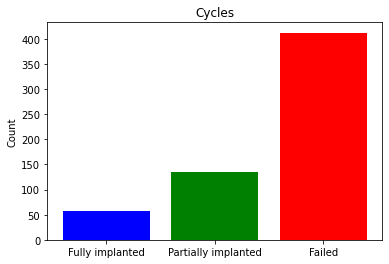

In [12]:
x=['Fully implanted', 'Partially implanted', 'Failed']
y=[full,pos-full,neg]
plt.bar(x,y,color=['b','g','r'])
plt.title('Cycles')
plt.ylabel('Count')

In [13]:
pos=sum(data_embryos['TasaExito'] > 0)
full=sum(data_embryos['TasaExito']== 1)
neg=sum(data_embryos['TasaExito'] == 0)
nan=sum(np.isnan(data_embryos['TasaExito']))
print('Total embryos: ',pos+neg+nan)
print('Transferred embryos: ', pos+neg)
print('Non-transferred embryos: ', nan)
print('Known outcome (implanted): ', full)
print('Known outcome (Not implanted): ', neg)
print('Unknown outcome (partially implanted): ', pos-full)

Total embryos:  3125
Transferred embryos:  1254
Non-transferred embryos:  1871
Known outcome (implanted):  108
Known outcome (Not implanted):  839
Unknown outcome (partially implanted):  307


Text(0, 0.5, 'Count')

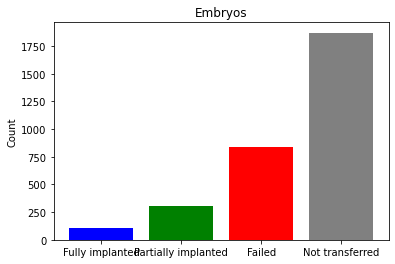

In [14]:
x=['Fully implanted', 'Partially implanted', 'Failed', 'Not transferred']
y=[full,pos-full,neg,nan]
plt.bar(x,y,color=['b','g','r','gray'])
plt.title('Embryos')
plt.ylabel('Count')

## ASEBIR quality

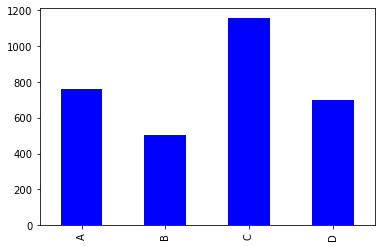

In [15]:
data_embryos['CALIDAD+2'].value_counts().sort_index().plot(kind='bar',color='b')

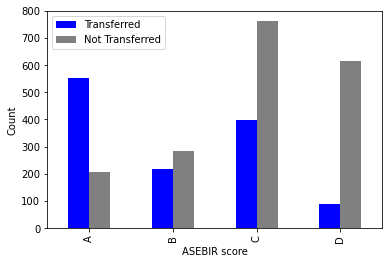

In [16]:
data_embryos.groupby(['CALIDAD+2', 'Transfer']
                     )['CodigoCiclo'].count().unstack()[['Si', 'No']].plot(kind='bar',color=['b','gray'])
plt.xlabel('ASEBIR score')
plt.ylabel('Count')
plt.legend(['Transferred', 'Not Transferred'])

## Success rate by ASEBIR quality

In [17]:
Transferred = data_embryos[data_embryos['TasaExito'].notnull()]
Transferred['Outcome'] = np.where(Transferred['TasaExito'] == 1, 'Implanted', np.where(Transferred['TasaExito'] >0, 'Partial', 'Not Implanted'))

<ipython-input-17-2bb770bda9b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Transferred['Outcome'] = np.where(Transferred['TasaExito'] == 1, 'Implanted', np.where(Transferred['TasaExito'] >0, 'Partial', 'Not Implanted'))


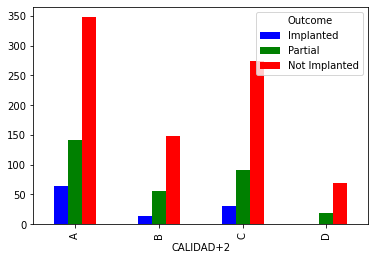

In [18]:
cols=['Implanted','Partial','Not Implanted']
Implanted = Transferred.groupby(
    ['CALIDAD+2', 'Outcome'])['CodigoCiclo'].count().unstack()[cols].plot(kind='bar',color=['b','g','r'])

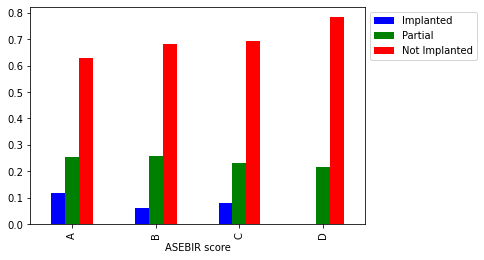

In [20]:
cols=['Implanted','Partial','Not Implanted']
Implanted = Transferred.groupby(
    ['CALIDAD+2', 'Outcome'])['CodigoCiclo'].count().unstack()[cols]
ImplantedNorm=Implanted.div(Implanted.sum(axis=1), axis=0)
ImplantedNorm.plot(kind='bar',color=['b','g','r'])
plt.xlabel('ASEBIR score')
plt.legend(['Implanted', 'Partial','Not Implanted'])
plt.legend(bbox_to_anchor=(1, 1))

In [21]:
ImplantedNorm

Outcome,Implanted,Partial,Not Implanted
CALIDAD+2,,,
A,0.115732,0.254973,0.629295
B,0.059908,0.258065,0.682028
C,0.078283,0.229798,0.691919
D,NaN,0.215909,0.784091


## Embryo per cycle

In [26]:
data_cycles.loc[54,'nEmbObten']=4
data_cycles.loc[54,'nEmbTrans']=3
data_cycles.loc[452,'nEmbObten']=2
data_cycles.loc[54,'nEmbTrans']=2
data_cycles.loc[466,'nEmbObten']=7
data_cycles.loc[466,'nEmbTrans']=2
data_cycles.loc[263,'nEmbObten']=2
data_cycles.loc[263,'nEmbTrans']=2
data_cycles.loc[297,'nEmbObten']=4
data_cycles.loc[297,'nEmbTrans']=2

Text(0.5, 0, 'Number of embryos in the cycle')

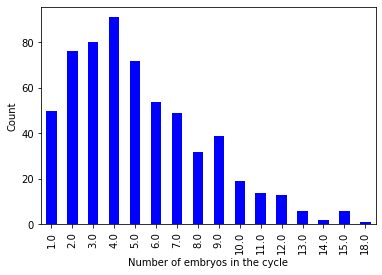

In [27]:
data_cycles.groupby('nEmbObten')['Codigo'].count().plot(kind='bar',color='b')
plt.ylabel('Count')
plt.xlabel('Number of embryos in the cycle')

Text(0.5, 0, 'Number of embryos transferred in the cycle')

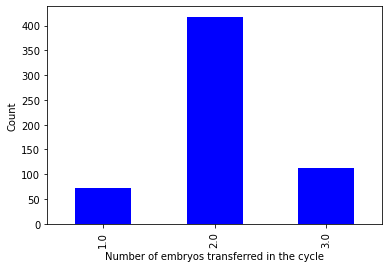

In [28]:
data_cycles.groupby('nEmbTrans')['Codigo'].count().plot(kind='bar',color='b')
plt.ylabel('Count')
plt.xlabel('Number of embryos transferred in the cycle')

## ASEBIR quality by nEmbObten

In [34]:
data_merge=data_embryos.merge(data_cycles[['Codigo','nEmbObten','nEmbTrans']],left_on='CodigoCiclo',right_on='Codigo')
data1=data_merge.groupby(
    ['nEmbObten','CALIDAD+2'])['CodigoCiclo'].count().unstack()

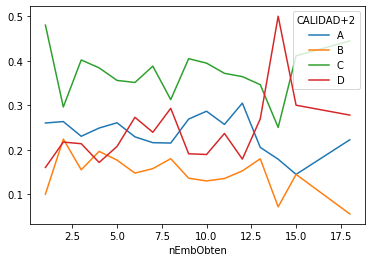

In [35]:
data1.div(data1.sum(axis=1), axis=0).plot()

## Success rate of the cycle by nEmbObten

In [43]:
ciclos=data_cycles[['Codigo','nEmbObten','nEmbTrans','TasaExito']]
ciclos['Outcome'] = np.where(ciclos['TasaExito']>0,1,0)
ciclosgroup=ciclos.groupby(['nEmbObten'])['Outcome'].mean()

<ipython-input-43-242b08e49fb7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ciclos['Outcome'] = np.where(ciclos['TasaExito']>0,1,0)


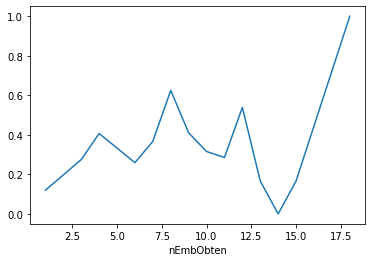

In [44]:
ciclosgroup.plot()

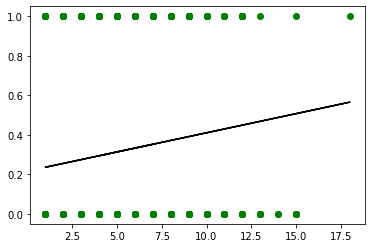

In [45]:
from sklearn.linear_model import LinearRegression

x=ciclos['nEmbObten'].values[:,np.newaxis]
y=ciclos['Outcome'].values

model = LinearRegression()
model.fit(x, y)

plt.scatter(x, y,color='g')
plt.plot(x, model.predict(x),color='k')

plt.show()

## ASEBIR quality of transferred embryos by nEmbObten

In [36]:
data_merge=data_embryos.merge(data_cycles[['Codigo','nEmbObten','nEmbTrans']],left_on='CodigoCiclo',right_on='Codigo')
data1=data_merge.groupby(
    ['nEmbObten','CALIDAD+2'])['CodigoCiclo'].count().unstack()
datatrans=data_merge[data_merge['Transfer']=='Si']

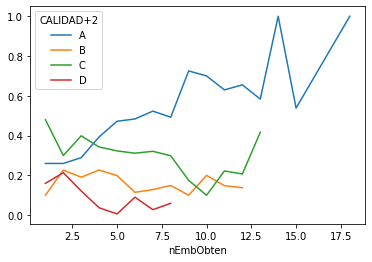

In [37]:
data1=datatrans.groupby(
    ['nEmbObten','CALIDAD+2'])['CodigoCiclo'].count().unstack()
data1.div(data1.sum(axis=1), axis=0).plot()

## ASEBIR quality of non-transferred embryos by nEmbObten

In [38]:
datatrans=data_merge[data_merge['Transfer']=='No']

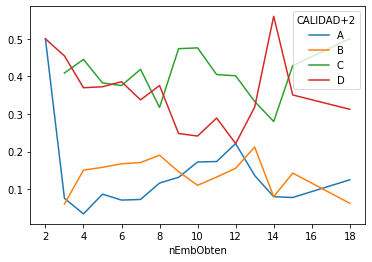

In [39]:
data1=datatrans.groupby(
    ['nEmbObten','CALIDAD+2'])['CodigoCiclo'].count().unstack()
data1.div(data1.sum(axis=1), axis=0).plot()

In [40]:
data2=datatrans.groupby(
    ['CodigoCiclo','CALIDAD+2'])['CodigoOvoc'].count().unstack()
data3=data2.merge(datatrans[['CodigoCiclo','nEmbObten','nEmbTrans']],left_index=True,right_on='CodigoCiclo',how='right')
data3=data3.groupby(['CodigoCiclo']).first().reset_index()
data3.fillna(0,inplace=True)
data3[['A','B','C','D']]=data3[['A','B','C','D']].div(data3['nEmbObten']-data3['nEmbTrans'], axis=0)

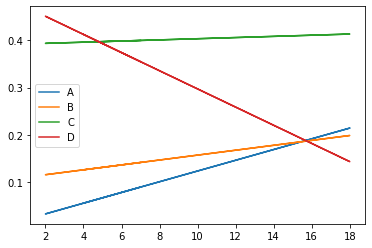

In [46]:
x=data3['nEmbObten'][:,np.newaxis]

models=[]
for Q in ['A','B','C','D']:
    y=data3[Q].values

    model = LinearRegression()
    model.fit(x, y)
    plt.plot(x, model.predict(x))
plt.legend(['A','B','C','D'])
plt.show()